<a href="https://colab.research.google.com/github/MarianaVillamilSastre/Data-analysis-for-fun/blob/master/Final_project_renewableSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import json
import math
import matplotlib.pyplot as plt
import io
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
data_to_load = files.upload()

Saving IRENAdata.csv to IRENAdata.csv


In [0]:
renewable = pd.read_csv(io.BytesIO(data_to_load['IRENAdata.csv']))

In [0]:
renewable

,Country,Technology,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,S America,Hydropower,Electricity generation (GWh),541433.5,511991.6,532552.0,554270.8,571914.6,602103.9,627600.3,650157.5,652372.6,671133.7,671072.6,713864.1,698610.6,675771.9,662580.8,642823.5,671672.9,664759.7
1,S America,Wind,Electricity generation (GWh),31.9,93.7,143.8,148.3,193.8,227.7,379.0,790.6,1333.5,1463.7,2653.4,3232.0,6059.3,7948.7,15515.3,27282.8,40817.8,52721.3
2,S America,Solar,Electricity generation (GWh),7.1,8.7,10.5,11.4,12.8,13.9,15.3,17.2,19.4,24.2,32.3,77.1,173.3,341.5,909.3,1813.6,3377.9,5693.2
3,S America,Bioenergy,Electricity generation (GWh),10508.6,12778.3,14166.4,15922.7,16934.3,18015.7,19037.2,23641.2,25628.5,30427.3,37684.9,41285.7,45175.4,51686.3,58158.4,61711.8,64514.3,64845.4
4,Argentina,Hydropower,Electricity generation (GWh),28761.8,36949.2,35796.8,33737.3,30018.8,34192.3,38056.4,31560.2,31456.3,35092.9,33825.8,31843.3,29657.9,33368.7,33098.5,34796.6,30132.4,39586.4
5,Argentina,Wind,Electricity generation (GWh),28.9,49.4,73.4,78.0,72.4,75.4,69.6,61.6,42.0,36.8,25.4,26.2,369.2,461.3,619.1,598.7,554.1,1616.2
6,Argentina,Solar,Electricity generation (GWh),0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,1.6,8.2,15.1,15.9,14.8,14.5,14.5
7,Argentina,Bioenergy,Electricity generation (GWh),675.0,624.0,869.0,1036.0,1176.0,1288.0,1659.0,1587.0,933.4,1105.5,1213.0,1255.7,1382.3,1526.3,1190.1,1268.0,1820.4,1830.7
8,Bolivia,Hydropower,Electricity generation (GWh),1914.9,2144.0,2202.9,1986.9,2148.6,1964.1,2155.2,2319.1,2309.2,2295.0,2173.2,2346.5,2351.8,2533.4,2233.0,2441.8,1719.8,2233.6
9,Bolivia,Wind,Electricity generation (GWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,8.2,11.5,34.9,60.4


In [0]:
SAmerica= renewable[renewable.Country == 'S America']
Argentina= renewable[renewable.Country == 'Argentina']
Bolivia= renewable[renewable.Country == 'Bolivia']
Brazil= renewable[renewable.Country == 'Brazil']
Chile = renewable[renewable.Country == 'Chile']
Colombia = renewable[renewable.Country == 'Colombia']
Ecuador= renewable[renewable.Country == 'Ecuador']
FlaklandsMalv= renewable[renewable.Country == 'Falklands Malv']
FRguiana= renewable[renewable.Country == 'Fr Guiana']
Guyana= renewable[renewable.Country == 'Guyana']
Paraguay= renewable[renewable.Country == 'Paraguay']
Peru = renewable[renewable.Country == 'Peru']
Suriname= renewable[renewable.Country == 'Suriname']
Uruguay= renewable[renewable.Country == 'Uruguay']
Venezuela= renewable[renewable.Country == 'Venezuela']

In [0]:
Colombia

,Country,Technology,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
20,Colombia,Hydropower,Electricity generation (GWh),31074.0,32439.0,34670.0,37197.0,39849.0,40979.0,42558.0,44242.0,46161.0,40837.0,40557.0,48427.0,47582.0,44363.0,44742.0,44682.0,46788.0,57342.0
21,Colombia,Wind,Electricity generation (GWh),NaN,NaN,NaN,NaN,51.0,50.0,63.0,50.0,54.0,58.0,39.0,41.0,55.0,58.0,70.0,68.0,51.0,3.0
22,Colombia,Solar,Electricity generation (GWh),5.8,6.0,6.2,6.4,6.5,6.8,6.9,7.2,7.3,7.4,7.6,7.7,8.1,8.3,8.5,8.9,8.9,14.3
23,Colombia,Bioenergy,Electricity generation (GWh),795.1,819.3,852.8,871.3,899.5,927.2,690.4,642.7,615.6,846.4,993.6,1317.4,1382.9,1440.1,2085.6,1898.6,1891.9,1954.3


In [0]:
Colombia.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,10624.966667,11088.100000,11843.000000,12691.566667,10201.500000,10490.750000,10829.575000,11235.475000,11709.47500,10437.200000,10399.300000,12448.275000,12257.000000,11467.350000,11726.525000,11664.375000,12184.950000,14828.400000
std,17713.779151,18494.892872,19773.293343,21226.733384,19769.270223,20329.923306,21154.552339,22006.261118,22969.34649,20270.173535,20110.339851,23993.564485,23558.622137,21940.469653,22031.460152,22029.222506,23085.398587,28357.237052
min,5.800000,6.000000,6.200000,6.400000,6.500000,6.800000,6.900000,7.200000,7.30000,7.400000,7.600000,7.700000,8.100000,8.300000,8.500000,8.900000,8.900000,3.000000
25%,400.450000,412.650000,429.500000,438.850000,39.875000,39.200000,48.975000,39.300000,42.32500,45.350000,31.150000,32.675000,43.275000,45.575000,54.625000,53.225000,40.475000,11.475000
50%,795.100000,819.300000,852.800000,871.300000,475.250000,488.600000,376.700000,346.350000,334.80000,452.200000,516.300000,679.200000,718.950000,749.050000,1077.800000,983.300000,971.450000,984.300000
75%,15934.550000,16629.150000,17761.400000,19034.150000,10636.875000,10940.150000,11157.300000,11542.525000,12001.95000,10844.050000,10884.450000,13094.800000,12932.675000,12170.825000,12749.700000,12594.450000,13115.925000,15801.225000
max,31074.000000,32439.000000,34670.000000,37197.000000,39849.000000,40979.000000,42558.000000,44242.000000,46161.00000,40837.000000,40557.000000,48427.000000,47582.000000,44363.000000,44742.000000,44682.000000,46788.000000,57342.000000


In [0]:
Col_hydro = Colombia.iloc[0:1, 4:21].T 
Col_wind=Colombia.iloc[1:2,4:21].T
Col_solar=Colombia.iloc[2:3,4:21].T
Col_bio=Colombia.iloc[3:4,4:21].T

Text(0.5, 1.0, 'Colombia solar energy generation')

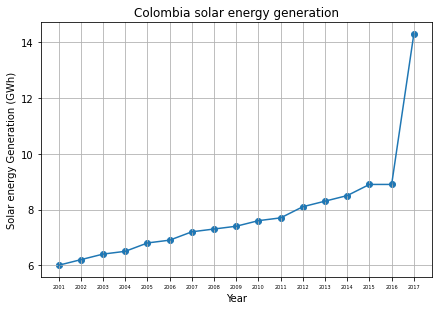

In [0]:
plt.plot(Col_solar.index.values,Col_solar.values)
plt.scatter(Col_solar.index.values,Col_solar.values)
plt.tight_layout()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Solar energy Generation (GWh)')
plt.title('Colombia solar energy generation')

[-588.96764706]
[[0.29705882]]


Text(0, 0.5, 'Solar energy Generation (GWh)')

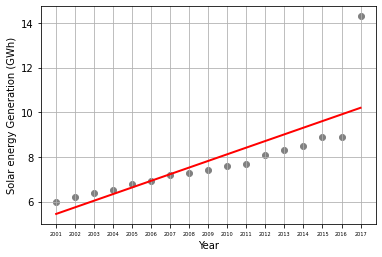

In [0]:
y = Col_solar.values.reshape(-1,1)
X =Col_solar.index.values.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(X, y) #Entrena el algoritmo 
#Para obtener el intercepto:
print(regressor.intercept_)
#Para obtener la pendiente
print(regressor.coef_)
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
plt.scatter(X[:,0], y[:,0],  color='gray')
plt.plot(X[:,0], y_pred[:,0], color='red', linewidth=2)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Solar energy Generation (GWh)')

In [0]:
#Prediction for Solar energy
y=0.29705882*2030-588.96764706
y

14.06175754000003

In [0]:
#Replace NAN for a zero value
Col_wind=Col_wind.fillna(0)

Text(0.5, 1.0, 'Colombia wind energy generation')

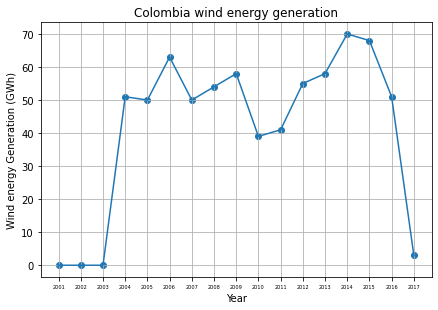

In [0]:
plt.plot(Col_wind.index.values,Col_wind)
plt.scatter(Col_wind.index.values,Col_wind)
plt.tight_layout()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Wind energy Generation (GWh)')
plt.title('Colombia wind energy generation')

[-4187.90931373]
[[2.10539216]]


Text(0, 0.5, 'Wind energy Generation (GWh)')

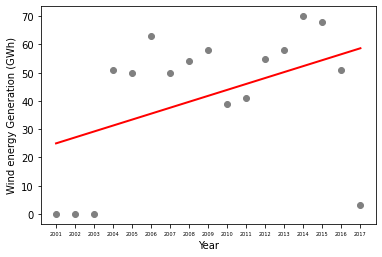

In [0]:
y = Col_wind.values.reshape(-1,1)
X =Col_wind.index.values.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(X, y) #Entrena el algoritmo 
#Para obtener el intercepto:
print(regressor.intercept_)
#Para obtener la pendiente
print(regressor.coef_)
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
plt.scatter(X[:,0], y[:,0],  color='gray')
plt.plot(X[:,0], y_pred[:,0], color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Wind energy Generation (GWh)')

In [0]:
#Prediction for wind energy
y=2.10539216*2030 - 4187.90931373
y

86.03677107000021

Text(0.5, 1.0, 'Colombia hydropower energy generation')

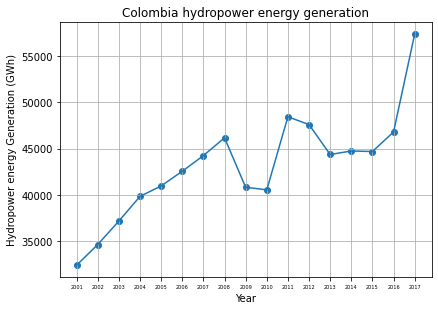

In [0]:
plt.plot(Col_hydro.index.values,Col_hydro)
plt.scatter(Col_hydro.index.values,Col_hydro)
plt.tight_layout()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Hydropower energy Generation (GWh)')
plt.title('Colombia hydropower energy generation')

Text(0.5, 1.0, 'Colombia bioenergy generation')

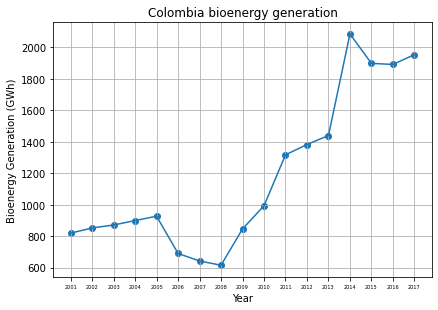

In [0]:
plt.plot(Col_bio.index.values,Col_bio)
plt.scatter(Col_bio.index.values,Col_bio)
plt.tight_layout()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Bioenergy Generation (GWh)')
plt.title('Colombia bioenergy generation')

In [0]:
data_to_load = files.upload()

Saving sum of cities.csv to sum of cities.csv


#WS50M_MIN = Wind speed (m/s)	

#DNR = Direct Normal Radiation (kW-hr/m^2/day) 
is the amount of solar radiation received per unit area by a surface that is always held perpendicular (or normal) to the rays that come in a straight line from the direction of the sun at its current position in the sky
#KT	= Insolation Clearness Index
It is the fraction of the solar radiation that is transmitted through the atmosphere to strike the surface of the Earth

#SI = Solar Irradiation ((kW-hr/m^2/day) 
For a fixed tilt angle, the maximum power over the course of a year is obtained when the tilt angle is equal to the latitude of the location

In [0]:
cities = pd.read_csv(io.BytesIO(data_to_load['sum of cities.csv']))
cities.head(12)

,City,Month,WS50M_MIN,DNR,KT,SI_EF_TILTED_SURFACE_HORIZONTAL,SI_EF_TILTED_SURFACE_LAT_MINUS15,SI_EF_TILTED_SURFACE_LATITUDE,SI_EF_TILTED_SURFACE_LAT_PLUS15,SI_EF_TILTED_SURFACE_VERTICAL,SI_EF_OPTIMAL,SI_EF_OPTIMAL_ANG,SI_EF_TRACKER
0,total,1,25.42,60.20,5.82,52.89,49.71,56.53,60.28,38.73,60.99,325.0,73.39
1,total,2,25.48,53.77,5.52,51.33,49.40,53.36,54.59,28.99,54.59,219.0,65.22
2,total,3,23.18,48.71,5.23,54.26,53.27,54.92,53.83,21.67,54.94,97.0,65.36
3,total,4,20.25,40.78,4.88,50.82,50.84,50.18,47.13,15.38,50.90,-32.5,58.62
4,total,5,17.81,39.85,4.80,48.91,49.61,47.39,42.98,14.46,49.81,-129.5,56.57
5,total,6,19.96,44.63,5.04,50.49,51.56,48.35,42.79,13.93,52.28,-178.0,59.81
6,total,7,20.67,47.88,5.24,52.79,53.81,50.70,45.10,13.87,54.38,-161.5,62.93
7,total,8,17.65,45.18,5.12,52.58,52.93,51.45,47.41,14.44,52.94,-77.0,61.55
8,total,9,14.00,42.17,5.03,51.08,50.55,51.16,49.24,17.50,51.23,43.0,59.67
9,total,10,13.96,41.87,4.89,48.32,46.88,49.58,49.83,24.60,50.00,171.0,58.33


In [0]:
wind=cities.iloc[0:12,2:3]
month=cities.iloc[0:12,1:2]
dnr=cities.iloc[0:12,3:4]
kt=cities.iloc[0:12,4:5]
dataframe=cities.iloc[0:12,2:5]

,WS50M_MIN,DNR,KT
0,25.42,60.20,5.82
1,25.48,53.77,5.52
2,23.18,48.71,5.23
3,20.25,40.78,4.88
4,17.81,39.85,4.80
5,19.96,44.63,5.04
6,20.67,47.88,5.24
7,17.65,45.18,5.12
8,14.00,42.17,5.03
9,13.96,41.87,4.89


Text(0.5, 1.0, 'Cities Wind')

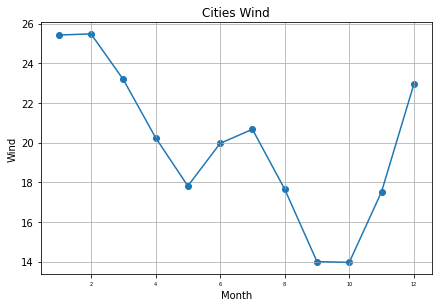

In [0]:
plt.plot(month.values,wind.values)
plt.scatter(month.values,wind.values)
plt.tight_layout()
plt.grid()
plt.xlabel('Month')
plt.ylabel('Wind')
plt.title('Cities Wind')

Text(0.5, 1.0, 'Cities DNR')

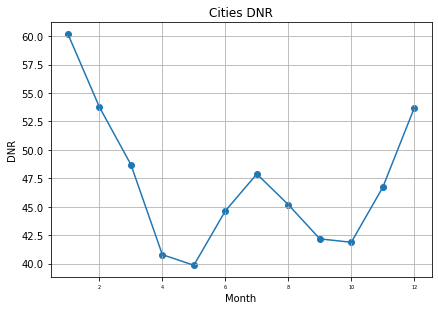

In [0]:
plt.plot(month.values,dnr.values)
plt.scatter(month.values,dnr.values)
plt.tight_layout()
plt.grid()
plt.xlabel('Month')
plt.ylabel('DNR')
plt.title('Cities DNR')

Text(0.5, 1.0, 'Cities KT')

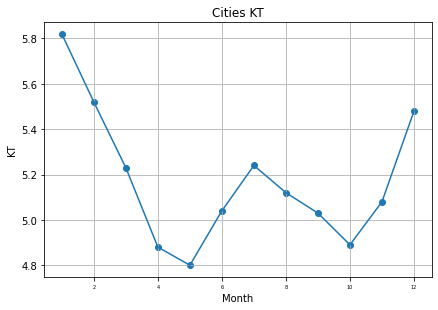

In [0]:
plt.plot(month.values,kt.values)
plt.scatter(month.values,kt.values)
plt.tight_layout()
plt.grid()
plt.xlabel('Month')
plt.ylabel('KT')
plt.title('Cities KT')

In [0]:
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,WS50M_MIN,DNR,KT
WS50M_MIN,1.0000,0.8085,0.7910
DNR,0.8085,1.0000,0.9899
KT,0.7910,0.9899,1.0000
